In [95]:
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing  
pd.set_option("display.max_rows", 200)

In [96]:
df=pd.read_csv('train.csv')

In [97]:
df=pd.read_csv('train.csv')
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [98]:
df.head(3).T

,0,1,2
PassengerId,0001_01,0002_01,0003_01
HomePlanet,Europa,Earth,Europa
CryoSleep,False,False,False
Cabin,B/0/P,F/0/S,A/0/S
Destination,TRAPPIST-1e,TRAPPIST-1e,TRAPPIST-1e
Age,39.0,24.0,58.0
VIP,False,False,True
RoomService,0.0,109.0,43.0
FoodCourt,0.0,9.0,3576.0
ShoppingMall,0.0,25.0,0.0


In [99]:
X=df.drop(['PassengerId','Name','Transported'],axis=1)
y=df['Transported']


In [100]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})
print(missing_info)

              Missing Values  Missing Percentage
PassengerId                0            0.000000
HomePlanet               201            2.312205
CryoSleep                217            2.496261
Cabin                    199            2.289198
Destination              182            2.093639
Age                      179            2.059128
VIP                      203            2.335212
RoomService              181            2.082135
FoodCourt                183            2.105142
ShoppingMall             208            2.392730
Spa                      183            2.105142
VRDeck                   188            2.162660
Name                     200            2.300702
Transported                0            0.000000


In [101]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [102]:
print('X:')
print( X.isnull().sum())

print('Y:')
print(y.isnull().sum())

X:
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64
Y:
0


In [103]:
print(X.dtypes)

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object


In [104]:
object_columns = X.select_dtypes(include=['object'])

for column in object_columns.columns:
    unique_values = X[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in HomePlanet: ['Europa' 'Earth' 'Mars' nan]
Unique values in CryoSleep: [False True nan]
Unique values in Cabin: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Unique values in Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Unique values in VIP: [False True nan]


In [105]:
print( X['Cabin'].nunique())

6560


In [106]:
X=X.drop('Cabin',axis=1)

In [107]:
X['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [108]:
X['HomePlanet'].fillna('Earth', inplace=True)
X['HomePlanet'].value_counts()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

In [109]:
X['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [110]:
X['CryoSleep'].fillna(False, inplace=True)
X['CryoSleep'].value_counts()

CryoSleep
False    5656
True     3037
Name: count, dtype: int64

In [111]:
X['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [112]:
X['Destination'].fillna('TRAPPIST-1e', inplace=True)
X['Destination'].value_counts()

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [113]:
X['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [114]:
X['VIP'].fillna(False,inplace=True)
X['VIP'].value_counts()

VIP
False    8494
True      199
Name: count, dtype: int64

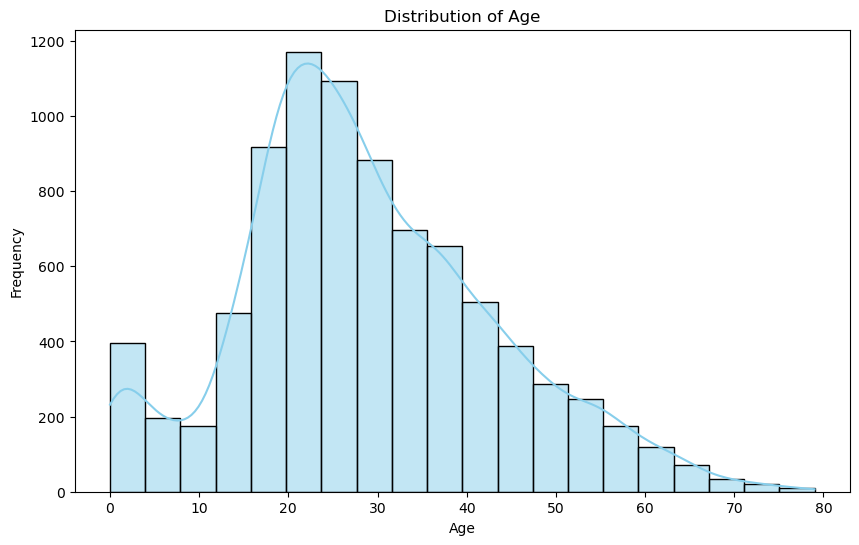

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(X['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [116]:
X['Age'].mean()

28.82793046746535

In [117]:
X['Age'].fillna(X['Age'].mean(), inplace=True)
X['Age'].isnull().sum()

0

In [118]:
# plt.figure(figsize=(8, 6))
# sns.countplot(x='RoomService', data=X, palette='viridis')
# plt.title('Distribution of RoomService')
# plt.xlabel('RoomService')
# plt.ylabel('Count')
# plt.show()


In [119]:
X['RoomService'].max()

14327.0

In [120]:

# plt.figure(figsize=(10, 6))
# sns.countplot(x=pd.cut(X['RoomService'], bins=range(0, 15000, 1000), right=False), palette='viridis')
# plt.title('Distribution of RoomService (Binned)')
# plt.xlabel('RoomService')
# plt.ylabel('Count')
# plt.show()


In [121]:

# plt.figure(figsize=(10, 6))
# sns.countplot(x=pd.cut(X['RoomService'], bins=range(0, 5000, 500), right=False), palette='viridis')
# plt.title('Distribution of RoomService (Binned)')
# plt.xlabel('RoomService')
# plt.ylabel('Count')
# plt.show()
 

In [122]:
# X['RoomService'].mean()

In [123]:
# X['RoomService'].fillna(X['RoomSearvice'].mean(), inplace=True)
# X['RoomService'].isnull().sum()

In [124]:
# X['FoodCourt'].max()

/var/folders/t3/r6v3mrkx00s0w8tzcgt6t6xh0000gn/T/ipykernel_47769/3010233237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(X['FoodCourt'], bins=range(0, 30000, 5000), right=False), palette='viridis')


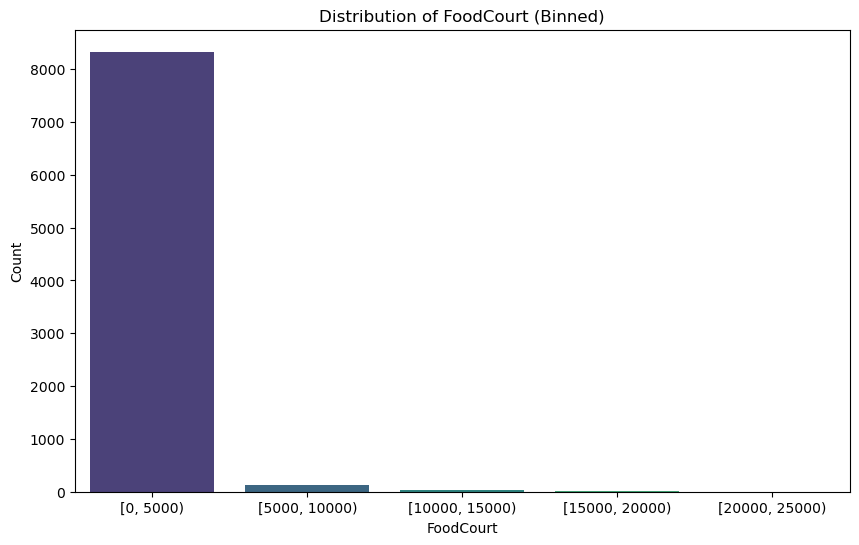

In [125]:

plt.figure(figsize=(10, 6))
sns.countplot(x=pd.cut(X['FoodCourt'], bins=range(0, 30000, 5000), right=False), palette='viridis')
plt.title('Distribution of FoodCourt (Binned)')
plt.xlabel('FoodCourt')
plt.ylabel('Count')
plt.show()


/var/folders/t3/r6v3mrkx00s0w8tzcgt6t6xh0000gn/T/ipykernel_47769/3880225411.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(X['FoodCourt'], bins=range(0, 5000, 500), right=False), palette='viridis')


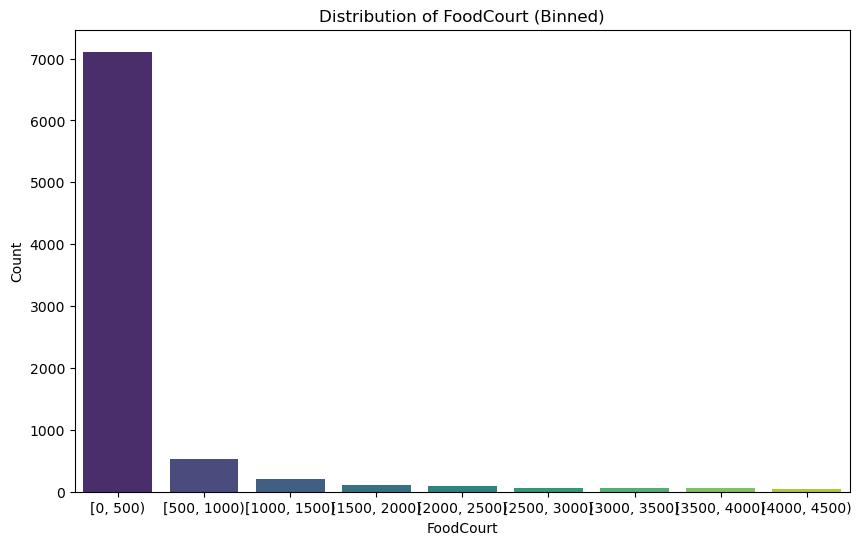

In [126]:
plt.figure(figsize=(10, 6))
sns.countplot(x=pd.cut(X['FoodCourt'], bins=range(0, 5000, 500), right=False), palette='viridis')
plt.title('Distribution of FoodCourt (Binned)')
plt.xlabel('FoodCourt')
plt.ylabel('Count')
plt.show()


In [127]:
# X['FoodCourt'].mean()

In [128]:
# X['FoodCourt'].fillna(X['FoodCourt'].mean(), inplace=True)
# X['FoodCourt'].isnull().sum()

In [129]:
# X['ShoppingMall'].max()

/var/folders/t3/r6v3mrkx00s0w8tzcgt6t6xh0000gn/T/ipykernel_47769/2924830035.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(X['ShoppingMall'], bins=range(0, 25001, 2500), right=False), palette='viridis')


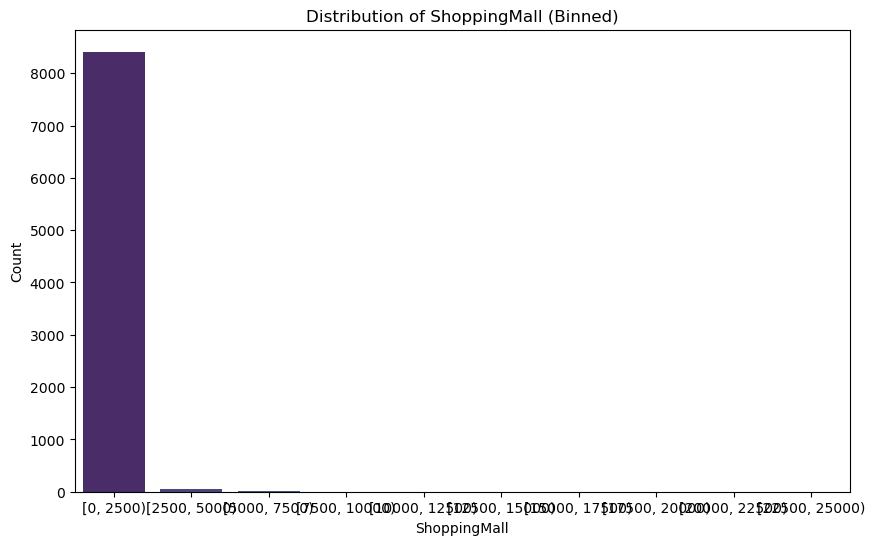

In [130]:
plt.figure(figsize=(10, 6))
sns.countplot(x=pd.cut(X['ShoppingMall'], bins=range(0, 25001, 2500), right=False), palette='viridis')
plt.title('Distribution of ShoppingMall (Binned)')
plt.xlabel('ShoppingMall')
plt.ylabel('Count')
plt.show()



/var/folders/t3/r6v3mrkx00s0w8tzcgt6t6xh0000gn/T/ipykernel_47769/3806648054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(X['ShoppingMall'], bins=range(0, 5000, 500), right=False), palette='viridis')


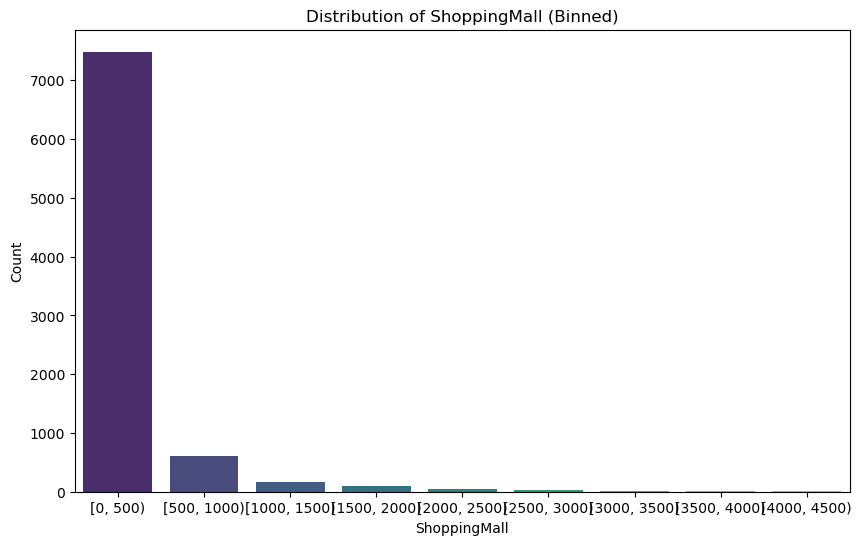

In [131]:
plt.figure(figsize=(10, 6))
sns.countplot(x=pd.cut(X['ShoppingMall'], bins=range(0, 5000, 500), right=False), palette='viridis')
plt.title('Distribution of ShoppingMall (Binned)')
plt.xlabel('ShoppingMall')
plt.ylabel('Count')
plt.show()



In [132]:
# X['ShoppingMall'].mean()

In [133]:
# X['ShoppingMall'].fillna(X['ShoppingMall'].mean(),inplace=True)
# X['ShoppingMall'].isnull().sum()

In [134]:
X['Spa'].max()

22408.0

/var/folders/t3/r6v3mrkx00s0w8tzcgt6t6xh0000gn/T/ipykernel_47769/1225339659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(X['VRDeck'], bins=range(0, 5000, 500), right=False), palette='viridis')


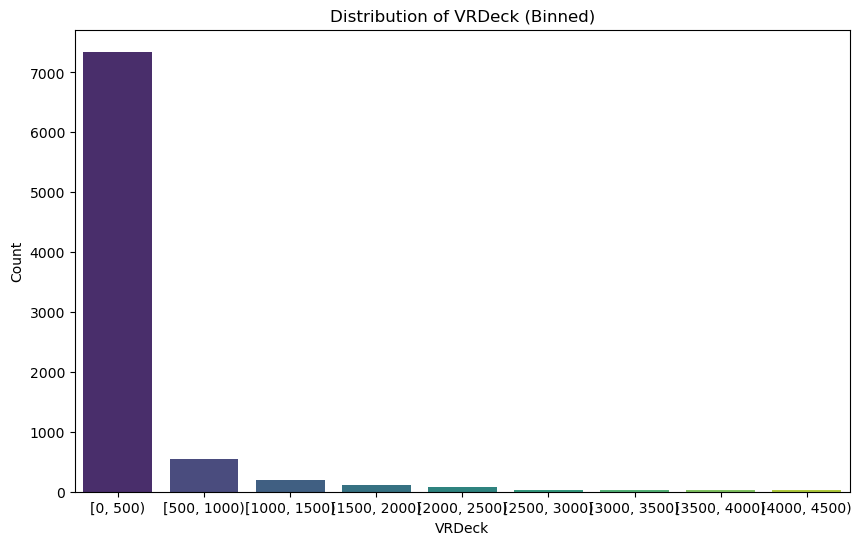

In [135]:
plt.figure(figsize=(10, 6))
sns.countplot(x=pd.cut(X['VRDeck'], bins=range(0, 5000, 500), right=False), palette='viridis')
plt.title('Distribution of VRDeck (Binned)')
plt.xlabel('VRDeck')
plt.ylabel('Count')
plt.show()



In [136]:
X['Spa'].fillna(X['Spa'].mean(),inplace=True)
X['Spa'].isnull().sum()
X['VRDeck'].fillna(X['VRDeck'].mean(),inplace=True)
X['VRDeck'].isnull().sum()

0

In [137]:
# df=pd.read_csv('dataset/spaceShip/train.csv')
# X=df.drop(['PassengerId','Name','Transported'],axis=1)
# y=df['Transported']


In [138]:
print((X['RoomService'] == 0).sum())
print((X['Spa'] == 0).sum())
print((X['ShoppingMall'] == 0).sum())
print((X['FoodCourt'] == 0).sum())
print((X['VRDeck'] == 0).sum())
X.shape

5577
5324
5587
5456
5495


(8693, 10)

In [139]:
columns_to_fill_zero = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X[columns_to_fill_zero] = X[columns_to_fill_zero].fillna(0)


In [140]:
print(X.isnull().sum())
print(X.dtypes)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64
HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object


In [141]:
# 'HomePlanet'와 'Destination' 열을 범주형으로 변환
X['HomePlanet'] = X['HomePlanet'].astype('category')
X['Destination'] = X['Destination'].astype('category')

# one-hot encoding 수행
X_encoded = pd.get_dummies(X, columns=['HomePlanet', 'Destination'], drop_first=True)


In [142]:
print(X_encoded.isnull().sum())
print(X_encoded.dtypes)

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64
CryoSleep                       bool
Age                          float64
VIP                             bool
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
HomePlanet_Europa               bool
HomePlanet_Mars                 bool
Destination_PSO J318.5-22       bool
Destination_TRAPPIST-1e         bool
dtype: object


In [143]:
# bool 자료형 열에 대해 True는 1, False는 0으로 변환
bool_columns = ['CryoSleep', 'VIP', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']
X_encoded[bool_columns] = X_encoded[bool_columns].astype(int)


In [144]:
print(X_encoded.isnull().sum())
print(X_encoded.dtypes)

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64
CryoSleep                      int64
Age                          float64
VIP                            int64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
HomePlanet_Europa              int64
HomePlanet_Mars                int64
Destination_PSO J318.5-22      int64
Destination_TRAPPIST-1e        int64
dtype: object


In [145]:
print(X_encoded['Age'].unique)
print(X_encoded['Age'].max)

<bound method Series.unique of 0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8693, dtype: float64>
<bound method NDFrame._add_numeric_operations.<locals>.max of 0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8693, dtype: float64>


In [146]:
# y와 X_encoded 합치기
data_with_target = pd.concat([y, X_encoded], axis=1)

# 상관계수 계산
correlation_with_target = data_with_target.corr()['Transported'].sort_values(ascending=False)

# 결과 출력
print(correlation_with_target)


Transported                  1.000000
CryoSleep                    0.460132
HomePlanet_Europa            0.176916
FoodCourt                    0.045583
HomePlanet_Mars              0.019544
ShoppingMall                 0.009391
Destination_PSO J318.5-22    0.000092
VIP                         -0.037261
Age                         -0.074249
Destination_TRAPPIST-1e     -0.096319
VRDeck                      -0.204825
Spa                         -0.218791
RoomService                 -0.241124
Name: Transported, dtype: float64


In [147]:
X_encoded['total'] = X_encoded[['RoomService', 'Spa', 'VRDeck', 'FoodCourt', 'ShoppingMall']].sum(axis=1)

In [148]:
#X_encoded.drop(['Destination_PSO J318.5-22'],axis=1,inplace=True)

In [149]:
#X_encoded.drop(['ShoppingMall'],axis=1,inplace=True)

In [150]:
X_encoded.dtypes

CryoSleep                      int64
Age                          float64
VIP                            int64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
HomePlanet_Europa              int64
HomePlanet_Mars                int64
Destination_PSO J318.5-22      int64
Destination_TRAPPIST-1e        int64
total                        float64
dtype: object

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 0.777458309373203
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.75      0.77       861
        True       0.77      0.80      0.78       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



/Users/nammin-u/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [152]:
X_By_Corr=X_encoded[['CryoSleep','RoomService','Spa','VRDeck','total']]

In [153]:
#상관계수 높은 열만 테스트
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_By_Corr, y, test_size=0.2, random_state=42)


model = LogisticRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 0.7625071880391029
Classification Report:
              precision    recall  f1-score   support

       False       0.77      0.75      0.76       861
        True       0.76      0.78      0.77       878

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739



In [154]:

correlation_matrix = X_encoded.corrwith(X_encoded['CryoSleep'])

# 결과 출력
print("Correlation with CryoSleep:")
print(correlation_matrix)


Correlation with CryoSleep:
CryoSleep                    1.000000
Age                         -0.070736
VIP                         -0.078281
RoomService                 -0.244089
FoodCourt                   -0.205928
ShoppingMall                -0.207798
Spa                         -0.198392
VRDeck                      -0.193107
HomePlanet_Europa            0.093395
HomePlanet_Mars              0.032715
Destination_PSO J318.5-22    0.087764
Destination_TRAPPIST-1e     -0.113380
total                       -0.376988
dtype: float64


In [155]:
print(X_train.shape)

(6954, 5)


In [156]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Accuracy: 0.7642323174238068
Classification Report:
              precision    recall  f1-score   support

       False       0.77      0.75      0.76       861
        True       0.76      0.78      0.77       878

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739



In [157]:
X_encoded.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,total
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0.0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0,0,0,1,736.0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1,0,0,1,10383.0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,1,5176.0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,0,0,0,1,1091.0


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터
# Feature Scaling


# 여러 가지 C 값 시도
for C_value in [0.001, 0.01, 0.1, 1, 10, 100]:
    # 모델 선택 및 학습
    model = LogisticRegression(C=C_value)
    model.fit(X_train_scaled, y_train)

    # 테스트 데이터에 대한 예측
    y_pred = model.predict(X_test_scaled)

    # 정확도 출력
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for C={C_value}: {accuracy}')

    # 분류 보고서 출력
    report = classification_report(y_test, y_pred)
    print(f'Classification Report for C={C_value}:')
    print(report)


Accuracy for C=0.001: 0.7550316273720529
Classification Report for C=0.001:
              precision    recall  f1-score   support

       False       0.72      0.82      0.77       861
        True       0.80      0.69      0.74       878

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.75      1739
weighted avg       0.76      0.76      0.75      1739



Accuracy for C=0.01: 0.772857964347326
Classification Report for C=0.01:
              precision    recall  f1-score   support

       False       0.76      0.79      0.77       861
        True       0.78      0.76      0.77       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

Accuracy for C=0.1: 0.7757331799884991
Classification Report for C=0.1:
              precision    recall  f1-score   support

       False       0.78      0.76      0.77       861
        True       0.77      0.79      0.78       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

Accuracy for C=1: 0.7780333525014376
Classification Report for C=1:
              precision    recall  f1-score   support

       False       0.79      0.75      0.77       861
        True       0.77 

In [160]:
print(X_encoded)

      CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0             0  39.0    0          0.0        0.0           0.0     0.0   
1             0  24.0    0        109.0        9.0          25.0   549.0   
2             0  58.0    1         43.0     3576.0           0.0  6715.0   
3             0  33.0    0          0.0     1283.0         371.0  3329.0   
4             0  16.0    0        303.0       70.0         151.0   565.0   
...         ...   ...  ...          ...        ...           ...     ...   
8688          0  41.0    1          0.0     6819.0           0.0  1643.0   
8689          1  18.0    0          0.0        0.0           0.0     0.0   
8690          0  26.0    0          0.0        0.0        1872.0     1.0   
8691          0  32.0    0          0.0     1049.0           0.0   353.0   
8692          0  44.0    0        126.0     4688.0           0.0     0.0   

      VRDeck  HomePlanet_Europa  HomePlanet_Mars  Destination_PSO J318.5-22  \
0       

In [161]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# X_encoded를 표준화
X_encoded_scaled = scaler.fit_transform(X_encoded)

# 표준화된 데이터 출력
print(X_encoded_scaled)


[[-0.73277002  0.70943692 -0.15306307 ... -0.31748665  0.65252063
  -0.51906868]
 [-0.73277002 -0.33671733 -0.15306307 ... -0.31748665  0.65252063
  -0.25632306]
 [-0.73277002  2.03456565  6.53325471 ... -0.31748665  0.65252063
   3.18757225]
 ...
 [-0.73277002 -0.1972301  -0.15306307 ... -0.31748665  0.65252063
   0.14957608]
 [-0.73277002  0.2212316  -0.15306307 ... -0.31748665 -1.5325186
   1.1363001 ]
 [-0.73277002  1.05815501 -0.15306307 ... -0.31748665  0.65252063
   1.20377146]]


In [162]:
import joblib
joblib.dump(scaler,'new_scaler.pkl')

['new_scaler.pkl']

In [163]:
# 예를 들어, 처음 5개 행과 처음 5개 열의 값을 출력
print(pd.DataFrame(X_encoded_scaled, columns=X_encoded.columns).head())


   CryoSleep       Age       VIP  RoomService  FoodCourt  ShoppingMall  \
0   -0.73277  0.709437 -0.153063    -0.333105  -0.281027     -0.283579   
1   -0.73277 -0.336717 -0.153063    -0.168073  -0.275387     -0.241771   
2   -0.73277  2.034566  6.533255    -0.268001   1.959998     -0.283579   
3   -0.73277  0.290975 -0.153063    -0.333105   0.523010      0.336851   
4   -0.73277 -0.894666 -0.153063     0.125652  -0.237159     -0.031059   

        Spa    VRDeck  HomePlanet_Europa  HomePlanet_Mars  \
0 -0.276663 -0.269023           1.754795        -0.503664   
1  0.211505 -0.230194          -0.569867        -0.503664   
2  5.694289 -0.225782           1.754795        -0.503664   
3  2.683471 -0.098708           1.754795        -0.503664   
4  0.225732 -0.267258          -0.569867        -0.503664   

   Destination_PSO J318.5-22  Destination_TRAPPIST-1e     total  
0                  -0.317487                 0.652521 -0.519069  
1                  -0.317487                 0.652521 -0

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y, test_size=0.2, random_state=42)

# 예시: 모델 선택 및 학습
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 선택
model = LogisticRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예시: 모델 평가
from sklearn.metrics import accuracy_score, classification_report

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 분류 보고서 출력
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 0.7780333525014376
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.75      0.77       861
        True       0.77      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [165]:
from sklearn.linear_model import LogisticRegression

model_l1 = LogisticRegression(penalty='l1', C=1, solver='liblinear')

model_l1.fit(X_train, y_train)

y_pred_l1 = model_l1.predict(X_test)

accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f'Accuracy with L1 regularization: {accuracy_l1}')

report_l1 = classification_report(y_test, y_pred_l1)
print('Classification Report with L1 regularization:')
print(report_l1)


Accuracy with L1 regularization: 0.7786083956296722
Classification Report with L1 regularization:
              precision    recall  f1-score   support

       False       0.79      0.75      0.77       861
        True       0.77      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [166]:
from sklearn.linear_model import LogisticRegression

# 엘라스틱넷 규제를 사용하는 로지스틱 회귀 모델 선택
model_elasticnet = LogisticRegression(penalty='elasticnet', C=1, l1_ratio=0.9, solver='saga', max_iter=1000)

# 모델 학습
model_elasticnet.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_elasticnet = model_elasticnet.predict(X_test)

# 정확도 출력
accuracy_elasticnet = accuracy_score(y_test, y_pred_elasticnet)
print(f'Accuracy with ElasticNet regularization: {accuracy_elasticnet}')

# 분류 보고서 출력
report_elasticnet = classification_report(y_test, y_pred_elasticnet)
print('Classification Report with ElasticNet regularization:')
print(report_elasticnet)


Accuracy with ElasticNet regularization: 0.7780333525014376
Classification Report with ElasticNet regularization:
              precision    recall  f1-score   support

       False       0.79      0.75      0.77       861
        True       0.77      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



/Users/nammin-u/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [167]:
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(random_state=42)

model_decision_tree.fit(X_train, y_train)

y_pred_decision_tree = model_decision_tree.predict(X_test)

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f'Accuracy with Decision Tree classifier: {accuracy_decision_tree}')

report_decision_tree = classification_report(y_test, y_pred_decision_tree)
print('Classification Report with Decision Tree classifier:')
print(report_decision_tree)


Accuracy with Decision Tree classifier: 0.7228292121909143
Classification Report with Decision Tree classifier:
              precision    recall  f1-score   support

       False       0.74      0.69      0.71       861
        True       0.71      0.76      0.73       878

    accuracy                           0.72      1739
   macro avg       0.72      0.72      0.72      1739
weighted avg       0.72      0.72      0.72      1739



In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 랜덤 포레스트 분류기 선택
model_random_forest = RandomForestClassifier(random_state=42)

# 모델 학습
model_random_forest.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_random_forest = model_random_forest.predict(X_test)

# 정확도 출력
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f'Accuracy with Random Forest classifier: {accuracy_random_forest}')

# 분류 보고서 출력
report_random_forest = classification_report(y_test, y_pred_random_forest)
print('Classification Report with Random Forest classifier:')
print(report_random_forest)


Accuracy with Random Forest classifier: 0.7740080506037953
Classification Report with Random Forest classifier:
              precision    recall  f1-score   support

       False       0.77      0.77      0.77       861
        True       0.77      0.78      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 랜덤 포레스트 분류기 선택 및 하이퍼파라미터 조정
model_random_forest = RandomForestClassifier(n_estimators=100, max_depth=7, max_features='sqrt', random_state=42)

# 모델 학습
model_random_forest.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_random_forest = model_random_forest.predict(X_test)

# 정확도 출력
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f'Accuracy with Random Forest classifier: {accuracy_random_forest}')

# 분류 보고서 출력
report_random_forest = classification_report(y_test, y_pred_random_forest)
print('Classification Report with Random Forest classifier:')
print(report_random_forest)


Accuracy with Random Forest classifier: 0.78205865439908
Classification Report with Random Forest classifier:
              precision    recall  f1-score   support

       False       0.81      0.74      0.77       861
        True       0.76      0.83      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [170]:
X_train[:][5].max()

1.985450202625669

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 랜덤 포레스트 분류기 선택 및 하이퍼파라미터 조정
model_random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)

# 모델 학습
model_random_forest.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_random_forest = model_random_forest.predict(X_test)

# 정확도 출력
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f'Accuracy with Random Forest classifier: {accuracy_random_forest}')

# 분류 보고서 출력
report_random_forest = classification_report(y_test, y_pred_random_forest)
print('Classification Report with Random Forest classifier:')
print(report_random_forest)


Accuracy with Random Forest classifier: 0.7889591719378953
Classification Report with Random Forest classifier:
              precision    recall  f1-score   support

       False       0.81      0.75      0.78       861
        True       0.77      0.82      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [172]:
# import joblib

# # 모델 저장
# joblib.dump(model_random_forest, 'random_forest_model.pkl')

# # 저장된 모델 불러오기
# loaded_model = joblib.load('random_forest_model.pkl')

# # 불러온 모델을 사용하여 예측 등을 수행할 수 있습니다.


In [173]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y, test_size=0.2, random_state=42)

# SVM 모델 선택
model_svm = SVC(kernel='linear', C=1.0, random_state=42)

# 모델 학습
model_svm.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_svm = model_svm.predict(X_test)

# 정확도 출력
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy with SVM: {accuracy_svm}')

# 분류 보고서 출력
report_svm = classification_report(y_test, y_pred_svm)
print('Classification Report with SVM:')
print(report_svm)


Accuracy with SVM: 0.7734330074755607
Classification Report with SVM:
              precision    recall  f1-score   support

       False       0.78      0.76      0.77       861
        True       0.77      0.79      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



In [174]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 모델 정의
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 시그모이드 함수는 이진 분류에 적합한 출력 함수
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 모델 평가
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Accuracy with MLP: {accuracy}')


Epoch 1/10
218/218 [==============================] - 0s 848us/step - loss: 0.4732 - accuracy: 0.7739 - val_loss: 0.4533 - val_accuracy: 0.7786
Epoch 2/10
218/218 [==============================] - 0s 614us/step - loss: 0.4361 - accuracy: 0.7916 - val_loss: 0.4429 - val_accuracy: 0.7861
Epoch 3/10
218/218 [==============================] - 0s 603us/step - loss: 0.4304 - accuracy: 0.7911 - val_loss: 0.4407 - val_accuracy: 0.7815
Epoch 4/10
218/218 [==============================] - 0s 600us/step - loss: 0.4281 - accuracy: 0.7942 - val_loss: 0.4420 - val_accuracy: 0.7872
Epoch 5/10
218/218 [==============================] - 0s 605us/step - loss: 0.4256 - accuracy: 0.7985 - val_loss: 0.4452 - val_accuracy: 0.7907
Epoch 6/10
218/218 [==============================] - 0s 577us/step - loss: 0.4245 - accuracy: 0.7942 - val_loss: 0.4431 - val_accuracy: 0.7786
Epoch 7/10
218/218 [==============================] - 0s 594us/step - loss: 0.4244 - accuracy: 0.7975 - val_loss: 0.4437 - val_accuracy:

In [175]:
X_train.shape

(6954, 13)

In [176]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 모델 정의
model_with_dropout = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),  # 드랍아웃 층 추가
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # 드랍아웃 층 추가
    layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
model_with_dropout.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_with_dropout.fit(X_train, y_train, epochs=50, batch_size=16, 
                       validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
accuracy_with_dropout = model_with_dropout.evaluate(X_test, y_test)[1]
print(f'Accuracy with MLP (Dropout): {accuracy_with_dropout}')


Epoch 1/50


435/435 [==============================] - 1s 679us/step - loss: 0.5275 - accuracy: 0.7351 - val_loss: 0.4541 - val_accuracy: 0.7775
Epoch 2/50
435/435 [==============================] - 0s 593us/step - loss: 0.4769 - accuracy: 0.7716 - val_loss: 0.4514 - val_accuracy: 0.7803
Epoch 3/50
435/435 [==============================] - 0s 576us/step - loss: 0.4705 - accuracy: 0.7846 - val_loss: 0.4506 - val_accuracy: 0.7855
Epoch 4/50
435/435 [==============================] - 0s 578us/step - loss: 0.4623 - accuracy: 0.7859 - val_loss: 0.4628 - val_accuracy: 0.7838
Epoch 5/50
435/435 [==============================] - 0s 554us/step - loss: 0.4602 - accuracy: 0.7876 - val_loss: 0.4572 - val_accuracy: 0.7855
Epoch 6/50
435/435 [==============================] - 0s 579us/step - loss: 0.4560 - accuracy: 0.7935 - val_loss: 0.4532 - val_accuracy: 0.7867
Epoch 7/50
435/435 [==============================] - 0s 546us/step - loss: 0.4549 - accuracy: 0.7929 - val_loss: 0.4512 - val_accuracy: 0.7872
Epo

In [177]:
joblib.dump(model_with_dropout,'mlpv1.h5')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2024-02-27 19:41:11         2135
metadata.json                                  2024-02-27 19:41:11           64
variables.h5                                   2024-02-27 19:41:11       106216


['mlpv1.h5']

In [178]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [179]:
test=joblib.load('mlpv1.h5')
test.predict(X_train)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2024-02-27 19:41:10         2135
metadata.json                                  2024-02-27 19:41:10           64
variables.h5                                   2024-02-27 19:41:10       106216
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
...vars
218/218 [==============================] - 0s 328us/step


array([[2.1796127e-01],
       [6.0607308e-01],
       [9.8470217e-01],
       ...,
       [4.3229306e-01],
       [6.0667574e-01],
       [4.8817694e-04]], dtype=float32)

In [186]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 모델 정의
model_with_dropout = keras.Sequential([
    layers.Dense(256, activation='relu',input_shape=(X_train.shape[1],)),
    layers.Dropout(0.8),  
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
model_with_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_with_dropout.fit(X_train, y_train, epochs=100, batch_size=16, 
                       validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
accuracy_with_dropout = model_with_dropout.evaluate(X_test, y_test)[1]
print(f'Accuracy with MLP (Dropout): {accuracy_with_dropout}')


Epoch 1/100
435/435 [==============================] - 1s 916us/step - loss: 0.5953 - accuracy: 0.6856 - val_loss: 0.4716 - val_accuracy: 0.7752
Epoch 2/100
435/435 [==============================] - 0s 795us/step - loss: 0.5028 - accuracy: 0.7596 - val_loss: 0.4565 - val_accuracy: 0.7815
Epoch 3/100
435/435 [==============================] - 0s 793us/step - loss: 0.4877 - accuracy: 0.7722 - val_loss: 0.4552 - val_accuracy: 0.7792
Epoch 4/100
435/435 [==============================] - 0s 800us/step - loss: 0.4731 - accuracy: 0.7724 - val_loss: 0.4509 - val_accuracy: 0.7821
Epoch 5/100
435/435 [==============================] - 0s 868us/step - loss: 0.4636 - accuracy: 0.7798 - val_loss: 0.4475 - val_accuracy: 0.7780
Epoch 6/100
435/435 [==============================] - 0s 792us/step - loss: 0.4657 - accuracy: 0.7850 - val_loss: 0.4544 - val_accuracy: 0.7838
Epoch 7/100
435/435 [==============================] - 0s 793us/step - loss: 0.4629 - accuracy: 0.7873 - val_loss: 0.4549 - val_ac

In [187]:
joblib.dump(model_with_dropout,'mlpv2.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2024-02-27 19:45:33         2706
metadata.json                                  2024-02-27 19:45:33  

['mlpv2.pkl']

In [89]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping

# Assuming X_encoded and y are already defined

# Convert X_encoded to a NumPy array
X_encoded_array = X_encoded.to_numpy()

# 데이터를 CNN에 맞게 변환 (3D 배열로 변환)
X_encoded_cnn = X_encoded_array.reshape((X_encoded_array.shape[0], X_encoded_array.shape[1], 1))

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded_cnn, y, test_size=0.2, random_state=42)

# CNN 모델 구축
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(13, 1)))
model.add(Dropout(0.5))  # Dropout layer added
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))  # L1 regularization added
model.add(Dropout(0.5))  # Dropout layer added
model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01)))  # L1 regularization added
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 훈련
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Test Accuracy: {accuracy}')


Epoch 1/100
435/435 [==============================] - 1s 1ms/step - loss: 7.3087 - accuracy: 0.6619 - val_loss: 3.3929 - val_accuracy: 0.7188
Epoch 2/100
435/435 [==============================] - 0s 827us/step - loss: 3.3216 - accuracy: 0.7061 - val_loss: 2.5035 - val_accuracy: 0.7251
Epoch 3/100
435/435 [==============================] - 0s 827us/step - loss: 2.4967 - accuracy: 0.6970 - val_loss: 2.2528 - val_accuracy: 0.7177
Epoch 4/100
435/435 [==============================] - 0s 860us/step - loss: 2.1884 - accuracy: 0.6930 - val_loss: 2.0051 - val_accuracy: 0.7280
Epoch 5/100
435/435 [==============================] - 0s 902us/step - loss: 1.9416 - accuracy: 0.6976 - val_loss: 1.7791 - val_accuracy: 0.7338
Epoch 6/100
435/435 [==============================] - 0s 874us/step - loss: 1.6926 - accuracy: 0.7164 - val_loss: 1.5444 - val_accuracy: 0.7677
Epoch 7/100
435/435 [==============================] - 0s 958us/step - loss: 1.4858 - accuracy: 0.7370 - val_loss: 1.3436 - val_accu

In [188]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.callbacks import EarlyStopping

#
X_encoded_array = X_encoded.to_numpy()


X_encoded_cnn = X_encoded_array.reshape((X_encoded_array.shape[0], X_encoded_array.shape[1], 1))


X_train, X_test, y_train, y_test = train_test_split(X_encoded_cnn, y, test_size=0.2, random_state=42)

scaler = StandardScaler()


X_train = scaler.fit_transform(X_train.reshape(-1, 1)).reshape(X_train.shape)

X_test = scaler.transform(X_test.reshape(-1, 1)).reshape(X_test.shape)


model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(13, 1)))
model.add(Dropout(0.5))  
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.02)))  
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Test Accuracy: {accuracy}')


Epoch 1/100
218/218 [==============================] - 1s 3ms/step - loss: 0.9335 - accuracy: 0.6907 - val_loss: 0.6040 - val_accuracy: 0.7550
Epoch 2/100
218/218 [==============================] - 0s 2ms/step - loss: 0.5606 - accuracy: 0.7728 - val_loss: 0.5235 - val_accuracy: 0.7631
Epoch 3/100
218/218 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.7752 - val_loss: 0.5149 - val_accuracy: 0.7683
Epoch 4/100
218/218 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.7847 - val_loss: 0.5080 - val_accuracy: 0.7746
Epoch 5/100
218/218 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7843 - val_loss: 0.5059 - val_accuracy: 0.7683
Epoch 6/100
218/218 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.7863 - val_loss: 0.5076 - val_accuracy: 0.7798
Epoch 7/100
218/218 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7889 - val_loss: 0.5018 - val_accuracy: 0.7706

In [189]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.callbacks import EarlyStopping

# Assuming X_encoded and y are already defined

# Convert X_encoded to a NumPy array
X_encoded_array = X_encoded.to_numpy()

# 데이터를 CNN에 맞게 변환 (3D 배열로 변환)
X_encoded_cnn = X_encoded_array.reshape((X_encoded_array.shape[0], X_encoded_array.shape[1], 1))

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded_cnn, y, test_size=0.2, random_state=42)

# 정규화를 위한 StandardScaler
scaler = StandardScaler()

# 훈련 데이터 정규화
X_train = scaler.fit_transform(X_train.reshape(-1, 1)).reshape(X_train.shape)
# 테스트 데이터 정규화
X_test = scaler.transform(X_test.reshape(-1, 1)).reshape(X_test.shape)

# CNN 모델 구축
model = Sequential()
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(13, 1)))
model.add(Dropout(0.5))  # Dropout layer added
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))  # L1 regularization added
model.add(Dropout(0.5))  # Dropout layer added
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.02)))  # L1 regularization added
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# 모델 훈련
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Test Accuracy: {accuracy}')


Epoch 1/100
218/218 [==============================] - 1s 4ms/step - loss: 0.8849 - accuracy: 0.7176 - val_loss: 0.5787 - val_accuracy: 0.7683
Epoch 2/100
218/218 [==============================] - 1s 3ms/step - loss: 0.5479 - accuracy: 0.7785 - val_loss: 0.5231 - val_accuracy: 0.7642
Epoch 3/100
218/218 [==============================] - 1s 3ms/step - loss: 0.5134 - accuracy: 0.7816 - val_loss: 0.5361 - val_accuracy: 0.7631
Epoch 4/100
218/218 [==============================] - 1s 4ms/step - loss: 0.5051 - accuracy: 0.7829 - val_loss: 0.4998 - val_accuracy: 0.7763
Epoch 5/100
218/218 [==============================] - 1s 4ms/step - loss: 0.5013 - accuracy: 0.7896 - val_loss: 0.5056 - val_accuracy: 0.7740
Epoch 6/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4972 - accuracy: 0.7916 - val_loss: 0.4950 - val_accuracy: 0.7844
Epoch 7/100
218/218 [==============================] - 1s 4ms/step - loss: 0.4956 - accuracy: 0.7931 - val_loss: 0.5005 - val_accuracy: 0.7700

In [529]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# 모델 정의
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),  # Batch Normalization 추가
    layers.Dropout(0.5),  # 드롭아웃 추가
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Accuracy with MLP: {accuracy}')


Epoch 1/50
218/218 [==============================] - 1s 1ms/step - loss: 0.6376 - accuracy: 0.7297 - val_loss: 0.5823 - val_accuracy: 0.7527
Epoch 2/50
218/218 [==============================] - 0s 750us/step - loss: 0.5569 - accuracy: 0.7534 - val_loss: 0.5211 - val_accuracy: 0.7596
Epoch 3/50
218/218 [==============================] - 0s 748us/step - loss: 0.5407 - accuracy: 0.7623 - val_loss: 0.4990 - val_accuracy: 0.7729
Epoch 4/50
218/218 [==============================] - 0s 813us/step - loss: 0.5209 - accuracy: 0.7749 - val_loss: 0.5023 - val_accuracy: 0.7706
Epoch 5/50
218/218 [==============================] - 0s 812us/step - loss: 0.5083 - accuracy: 0.7804 - val_loss: 0.4973 - val_accuracy: 0.7711
Epoch 6/50
218/218 [==============================] - 0s 741us/step - loss: 0.5024 - accuracy: 0.7844 - val_loss: 0.4948 - val_accuracy: 0.7711
Epoch 7/50
218/218 [==============================] - 0s 736us/step - loss: 0.5012 - accuracy: 0.7821 - val_loss: 0.4996 - val_accuracy: 0

In [530]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y, test_size=0.2, random_state=42)

# XGBoost 데이터 형식인 DMatrix 생성
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost 모델 설정
params = {
    'objective': 'binary:logistic',  # 이진 분류 문제 설정
    'eval_metric': 'error',  # 평가 지표 설정 (분류 오류)
    'eta': 0.15,  # 학습률
    'max_depth': 10,  # 트리의 최대 깊이
    'subsample': 0.5,  # 행 샘플링 비율
    'colsample_bytree': 0.5,  # 열 샘플링 비율
    'seed': 42  # 랜덤 시드
}

# 모델 학습
num_rounds = 100  # 학습 라운드 수
model = xgb.train(params, dtrain, num_rounds)

# 테스트 데이터에 대한 예측
y_pred_probs = model.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]

# 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 분류 보고서 출력
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Accuracy: 0.7809085681426107
Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.75      0.77       861
        True       0.77      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [531]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y, test_size=0.2, random_state=42)

# Gradient Boosting 모델 선택 및 학습
model_gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=10, random_state=42)
model_gradient_boosting.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model_gradient_boosting.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Gradient Boosting classifier: {accuracy}')

# 분류 보고서 출력
report = classification_report(y_test, y_pred)
print('Classification Report with Gradient Boosting classifier:')
print(report)


Accuracy with Gradient Boosting classifier: 0.7694077055779184
Classification Report with Gradient Boosting classifier:
              precision    recall  f1-score   support

       False       0.78      0.75      0.76       861
        True       0.76      0.79      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



In [532]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y, test_size=0.2, random_state=42)

# 개별 분류기 정의
logistic_regression = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(probability=True, random_state=42)

# 보팅 분류기 정의 (소프트 보팅)
voting_classifier = VotingClassifier(estimators=[
    ('logistic_regression', logistic_regression),
    ('random_forest', random_forest),
    ('svm_classifier', svm_classifier)
], voting='hard')


# 보팅 분류기 학습
voting_classifier.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = voting_classifier.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Voting Classifier: {accuracy}')

# 분류 보고서 출력
report = classification_report(y_test, y_pred)
print('Classification Report with Voting Classifier:')
print(report)


Accuracy with Voting Classifier: 0.7860839562967222
Classification Report with Voting Classifier:
              precision    recall  f1-score   support

       False       0.80      0.76      0.78       861
        True       0.78      0.81      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [533]:
X_encoded.head().T

,0,1,2,3,4
CryoSleep,0.0,0.0,0.0,0.0,0.0
Age,39.0,24.0,58.0,33.0,16.0
VIP,0.0,0.0,1.0,0.0,0.0
RoomService,0.0,109.0,43.0,0.0,303.0
FoodCourt,0.0,9.0,3576.0,1283.0,70.0
ShoppingMall,0.0,25.0,0.0,371.0,151.0
Spa,0.0,549.0,6715.0,3329.0,565.0
VRDeck,0.0,44.0,49.0,193.0,2.0
HomePlanet_Europa,1.0,0.0,1.0,1.0,0.0
HomePlanet_Mars,0.0,0.0,0.0,0.0,0.0


In [534]:
X_encoded['spend']=(X_encoded['total']==0).astype(int)
print(X_encoded['spend'])
X_encoded.dtypes

0       1
1       0
2       0
3       0
4       0
       ..
8688    0
8689    1
8690    0
8691    0
8692    0
Name: spend, Length: 8693, dtype: int64


CryoSleep                      int64
Age                          float64
VIP                            int64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
HomePlanet_Europa              int64
HomePlanet_Mars                int64
Destination_PSO J318.5-22      int64
Destination_TRAPPIST-1e        int64
total                        float64
spend                          int64
dtype: object